# Mini-projet DATA 2019-2020 : Sujet

## Introduction au projet

Il s'agit dans ce projet de construire un modèle prédictif du risque de défaut de paiement sur un crédit, en fonction de variables décrivant la personne bénéficiant de ce prêt ainsi que l'historique des remboursements sur les 6 derniers mois.

__Déroulement et évaluation :__ 
* Si vous choisissez de passer l'examen écrit du 1er juillet, votre projet ne sera pas noté. Ce mini-projet est néanmoins l'occasion de traiter en pratique un problème de classification (les PC ne traitant que de problèmes de régression) et de réutiliser des notions vues dans les PC sur un nouveau jeu de données.
* __Si vous choisissez de ne pas passer l'examen écrit du 1er juillet, vous devrez rendre un rapport de projet.__ Les consignes précises pour ce rapport vous seront données début juin. Vous pouvez travailler à deux ou plus ensemble sur le projet, mais devrez rendre un rapport individuel.
* À la fin du projet, vous pourrez comparer vos prédictions sur des données dont l'étiquette ne vous est pas donnée pour l'instant à leurs étiquettes réelles.

Le mini-projet est moins guidé que les PC, mais vous pouvez souvent _réutiliser du code_ des précédentes PC. La PC du __20 mai__ est consacrée à la découverte du projet. C'est l'occasion de découvrir les données et de commencer à vous attaquer à la première partie. La deuxième partie est moins guidée, et vous aurez besoin des notions abordées lors des séances des 3 et 10 juin pour l'aborder.

__Mise en contexte :__ Les données que vous allez utiliser sont proches de données réelles.
Vous semblerait-il intéressant, pour une banque, de déployer un tel modèle, entrainé sur ses données ? Quelle performance vous semblerait acceptable pour votre cas d'usage ? Quels risques pourrait-on encourir ? Quel(s) autre(s) usage(s) pourrait-on faire de ces données ? Un des buts du chapitre 6, que nous traiterons lors du prochain cours, est de vous amener à réfléchir à ce genre de questions.

## Première partie (à partir du 20 mai 2020)

## 1. Données

Les données publiques, c'est-à-dire celles qui sont étiquetées, sont contenues dans le fichier `../data/credit_public.csv`. Chaque ligne correspond à un prêt. Chaque prêt est décrit par les variables suivantes :
```
    Credit_total : montant du crédit (€)
    Sexe : 
       1 = M
       2 = F
    Education : 
        1 = Études supérieures, Bac+5 ou plus ; 
        2 = Études supérieures < Bac+5 ; 
        3 = Bac ; 
        4 = Autre / inconnu
    Statut_marital : 
        1 = mariage ; 
        2 = célibat ; 
        3 = autre / inconnu
    Age : en années
    Statut_mois_1 -- Statut_mois_6 : statut du remboursement sur les 6 mois précédents 
        (Statut_mois_1 : le mois précédent ; Statut_mois_6 : 6 mois avant). 
        -2 = pas de consommation sur le crédit ;
        -1 = payé à l'échéance ; 
        0 = système de crédit renouvelable plutôt qu'à l'échéance ; 
        1 = payé avec 1 mois de retard ; 
        2 = payé avec 2 mois de retard ; ... ; 
        8 = payé avec 8 mois de retard ou plus.
    Montant_mois_1 -- Montant_mois_6 : montant dû à chacun des 6 mois précédents 
        (Montant_mois_1 : le mois précédent ; Montant_mois_6 : 6 mois avant)
    Versement_mois_1 -- Versement_mois_6 : montant remboursé (€) à chacun des 6 mois précédents
        (Versement_mois_1 : le mois précédent ; Versement_mois_6 : 6 mois avant)
    Defaut_de_paiement : défaut de paiement 
        0 = non
        1 = oui 
```


__Question :__ Quelle est la nature du problème d'apprentissage ? Quelles sont les étiquettes ?

Il s'agit d'un apprentissage supervisé, dont les étiquettes sont 0 et 1 pour le défaut de paiement.

### 1.1 Chargement des données

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
df_public = pd.read_csv('../data/credit_public.csv', sep='\t')

In [5]:
df_public.head()

,Credit_total,Sexe,Education,Statut_marital,Age,Statut_mois_1,Statut_mois_2,Statut_mois_3,Statut_mois_4,Statut_mois_5,...,Montant_mois_4,Montant_mois_5,Montant_mois_6,Versement_mois_1,Versement_mois_2,Versement_mois_3,Versement_mois_4,Versement_mois_5,Versement_mois_6,Defaut_de_paiement
0,1190,1,2,2,27,2,2,0,0,0,...,234,214,219,133,38,12,12,12,16,0
1,5238,1,1,1,45,1,2,0,0,0,...,3779,3860,3938,0,181,136,143,143,293,0
2,1190,2,2,2,22,0,0,0,0,0,...,705,722,688,47,36,24,27,26,48,1
3,1905,2,1,2,27,-1,-1,2,-1,-1,...,57,10,69,309,0,57,10,76,175,1
4,1667,1,2,2,27,0,0,0,0,0,...,2004,1135,1173,98,57,60,43,57,114,0


### 1.2 Création d'un jeu d'entrainement et d'un jeu de test

__Consigne :__ Créer deux array `X_public` et `y_public` contenant, respectivement, les données non étiquetées et les étiquettes.

In [6]:
x_public = np.array(df_public.drop(columns = ["Defaut_de_paiement"]))
y_public = np.array(df_public["Defaut_de_paiement"])

Regardons combien d'étiquettes de chaque classe `y_public` contient :

In [7]:
# Les étiquettes positives sont des 1, et les négatives des 0,
# on peut aussi utiliser
print("Nombres d'étiquettes positives : %d" % (np.sum(y_public)))
print("Nombres d'étiquettes négatives : %d" % ((np.size(y_public) - np.sum(y_public))))
# Il vaut quand même mieux vérifier qu'il n'y a bien que des 0 et des 1
print("Valeurs uniques dans y_public :", np.unique(y_public))

Nombres d'étiquettes positives : 1011
Nombres d'étiquettes négatives : 3480
Valeurs uniques dans y_public : [0 1]


Nous allons maintenant créer un jeu d'entrainement (80%) des données et un jeu de test (20%) des données, en respectant les proportions relatives d'exemples de chaque classe dans les deux jeux (on parle de _stratification_).

In [8]:
from sklearn import model_selection

In [9]:
# Use 20% for testing (X_test, y_test) and the rest for training (X_train, y_train)
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_public, y_public, test_size=0.20,
                                                                    stratify = y_public, # stratification
                                                                    random_state=92)

Vérifiez que `X_train`, `X_test`, `y_train`, `y_test` ont bien la forme que vous attendiez.

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(X_train)

((3592, 23), (899, 23), (3592,), (899,), numpy.ndarray)

__Question :__ Pourquoi stratifier les jeux de données ?

La stratification des données par le défaut de paiement permet d'avoir un échantillon représentatif de tous les cas. Elle permet de pouvoir toujours répondre au test qui subviendra pour savoir s'il y aura défaut de paiement ou non.

## 2. Visualisation des variables

__Consigne :__ Choisissez des représentations appropriées pour visualiser les différentes variables de votre jeu de données, y compris les étiquettes. 

Qu'observez-vous ? Quelles transformations vous sembleraient judicieuses ? 

Nous allons comme dans la Pc3 séparer les données continues des données discrètes

In [11]:
continuous_features = ["Age", "Credit_total", "Montant_mois_1", "Montant_mois_2", "Montant_mois_3", "Montant_mois_4", "Montant_mois_5", "Montant_mois_6", "Versement_mois_1", "Versement_mois_2","Versement_mois_3","Versement_mois_4","Versement_mois_5","Versement_mois_6", ]
discrete_features = ["Sexe","Education", "Statut_marital", "Statut_mois_1", "Statut_mois_2", "Statut_mois_3", "Statut_mois_4", "Statut_mois_5", "Statut_mois_6"]

features = list(df_public.drop(columns=["Defaut_de_paiement"]).columns)

continuous_features_idx = [features.index(feat_name) for feat_name in continuous_features]
discrete_features_idx = [features.index(feat_name) for feat_name in discrete_features]

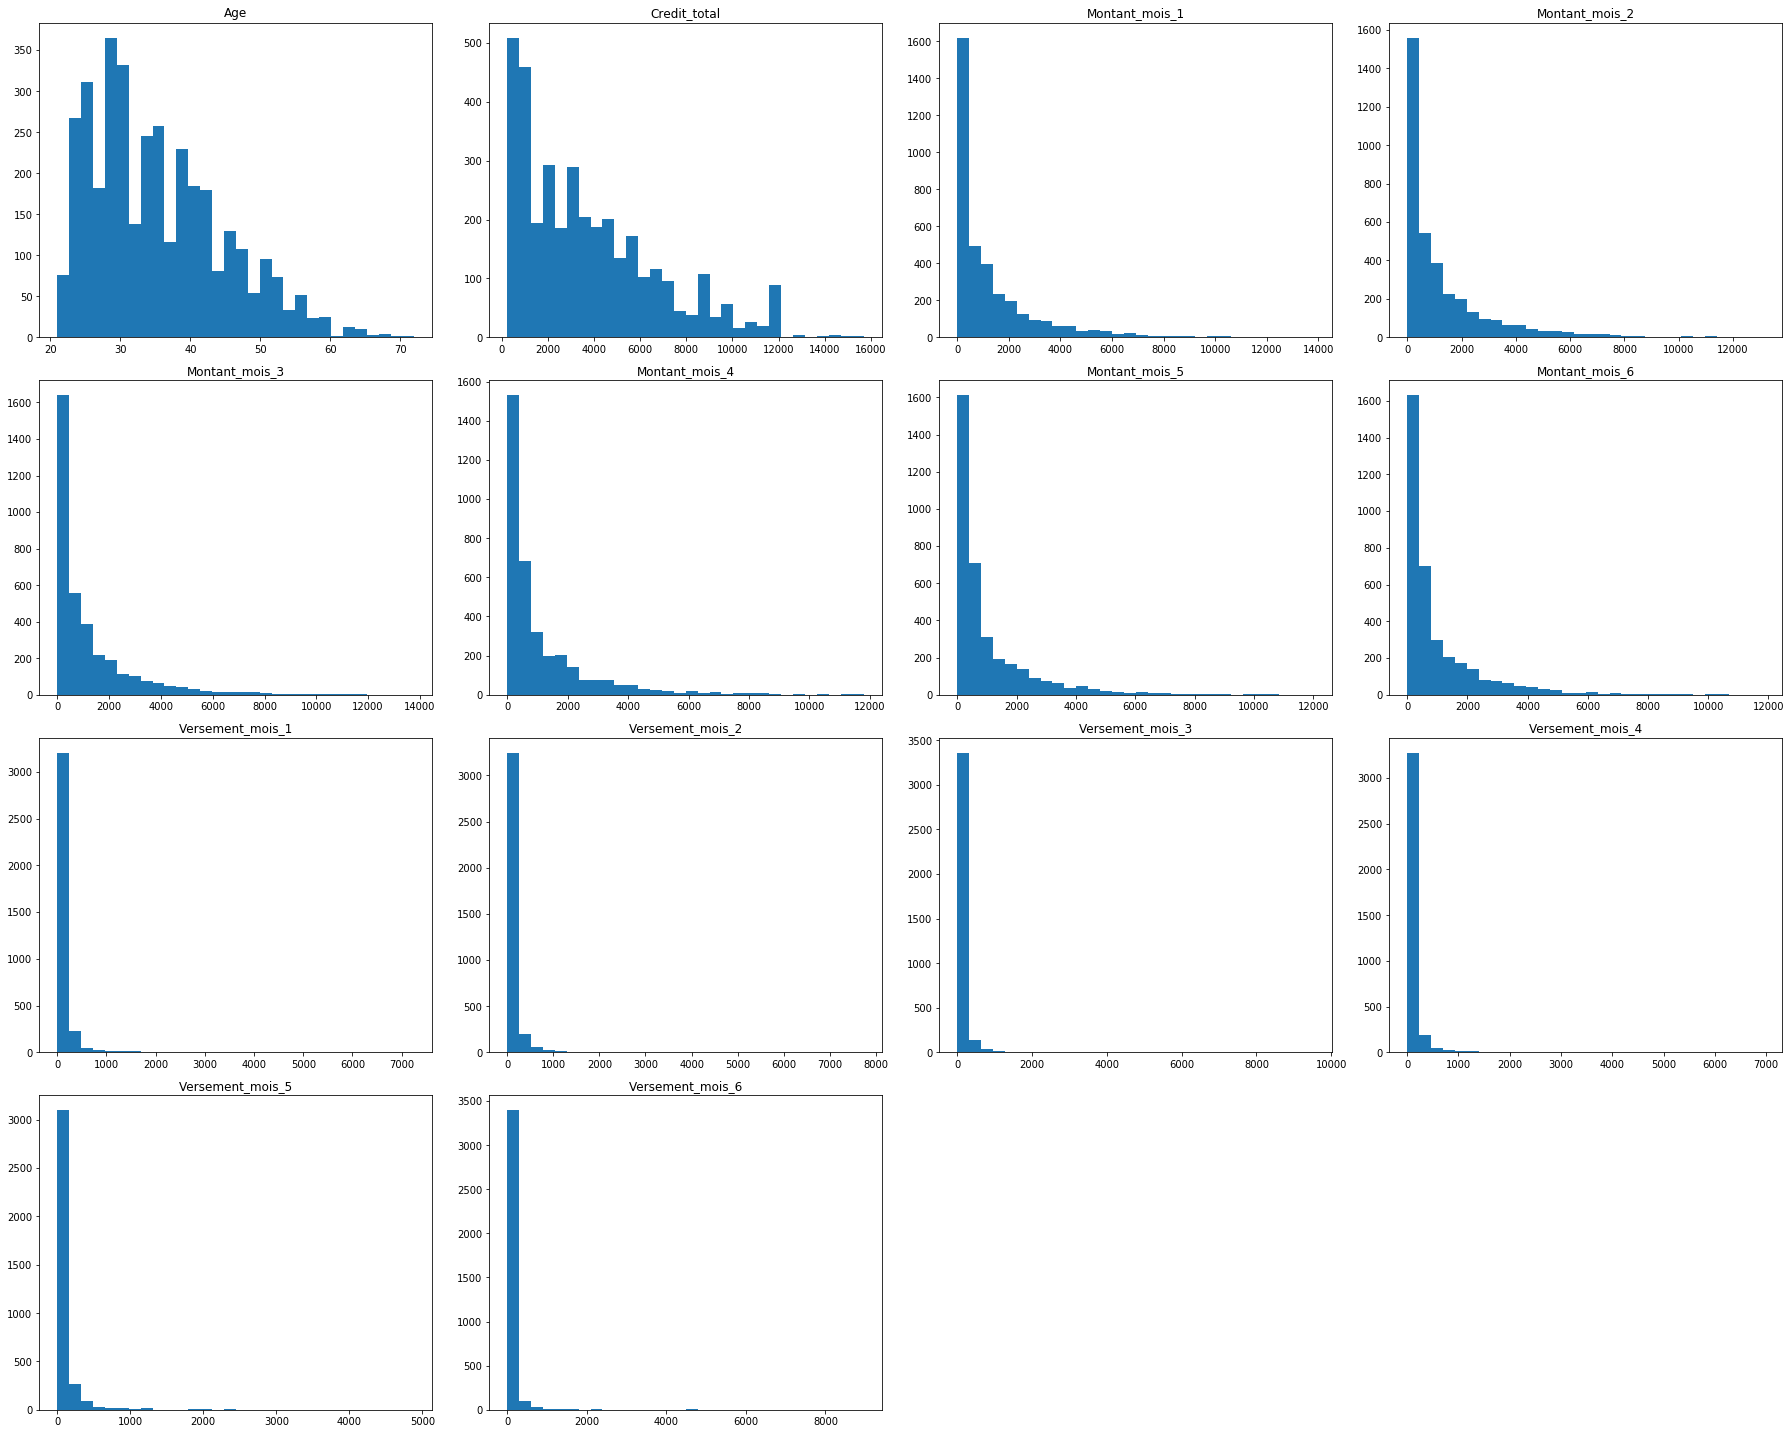

In [12]:
fig = plt.figure(figsize=(25, 20))

# Histograms for continuous features
for (plot_idx, feat_idx) in enumerate(continuous_features_idx):
    # create a subplot in the (plot_idx+1) position of a 2x2 grid
    ax = fig.add_subplot(4, 4, (plot_idx+1))
    # plot the histogram of feat_idx
    h = ax.hist(X_train[:, feat_idx], bins=30, edgecolor='none')
    # use the name of the feature as a title for each histogram
    ax.set_title(features[feat_idx])
# espacement entre les subplots
fig.tight_layout(pad=1.0)

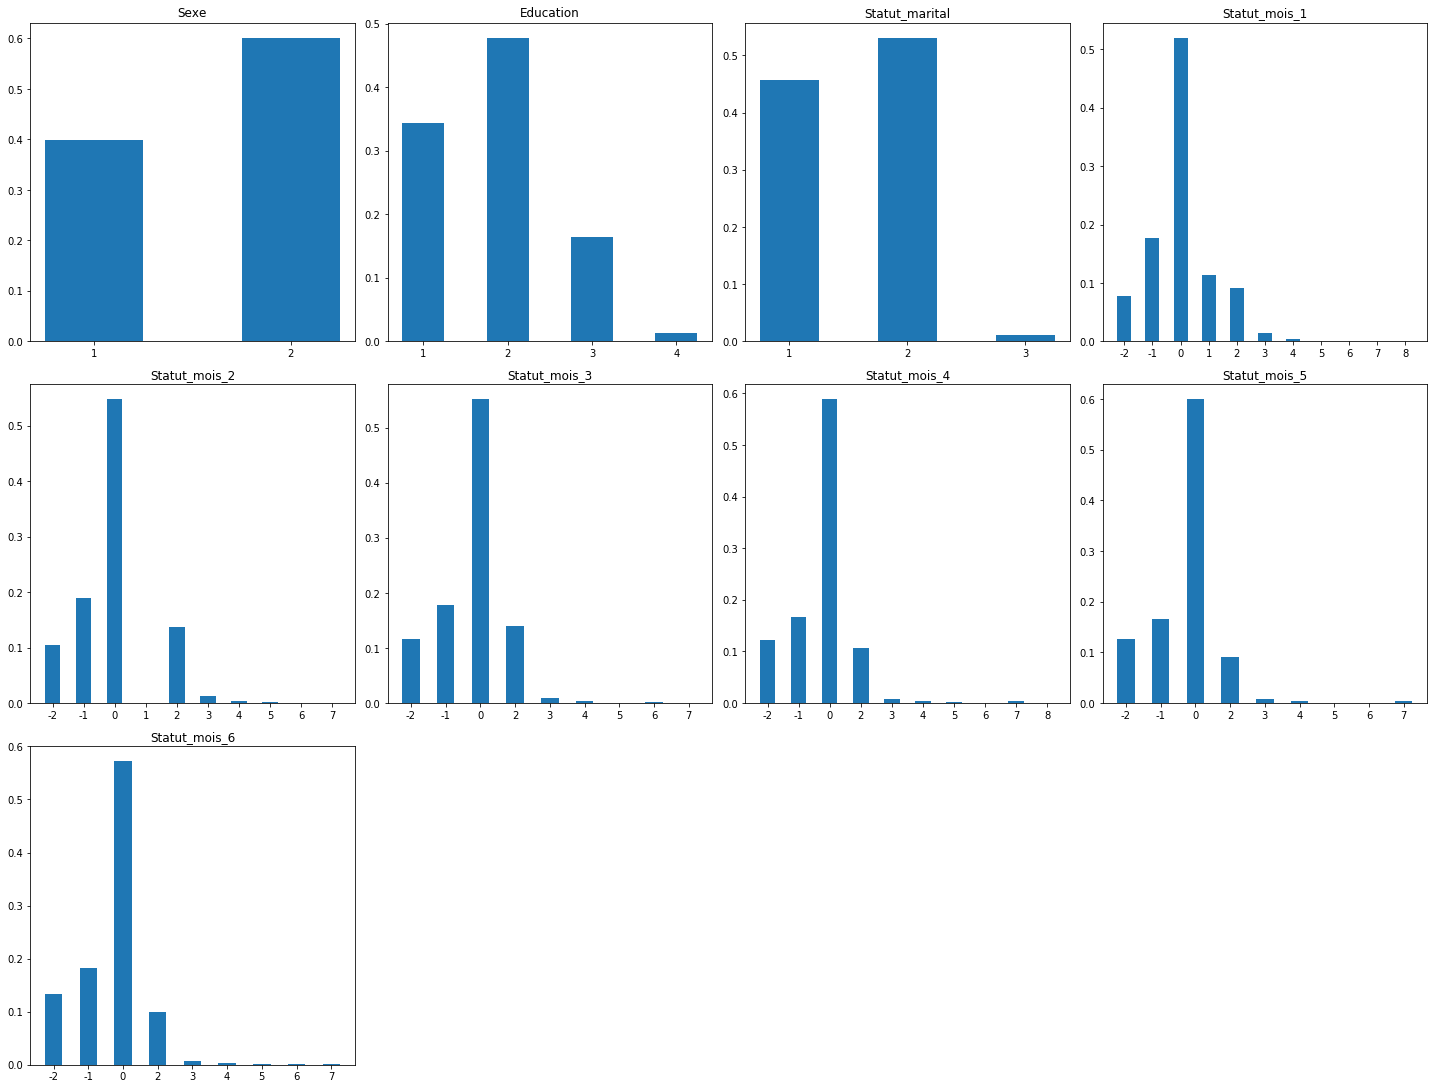

In [13]:
# Bar plots for discrete features
fig = plt.figure(figsize=(20, 20))

for (plot_idx, feat_idx) in enumerate(discrete_features_idx):
    # create a subplot in the (plot_idx+1) position of a 2x5 grid
    ax = fig.add_subplot(4, 4, (plot_idx+1))

    feature_values = np.unique(X_train[:, feat_idx])
    frequencies = [(float(len(np.where(X_train[:, feat_idx]==value)[0]))/X_train.shape[0]) \
                   for value in feature_values]
    
    b = ax.bar(range(len(feature_values)), frequencies, width=0.5, 
               tick_label=list([int(n) for n in feature_values]))
    
    # use the name of the feature as a title for each histogram
    ax.set_title(features[feat_idx])
fig.tight_layout(pad=1.0)

Et finalement on représente les étiquettes :

In [16]:
plt.bar(y_train)
plt.title("défaut de paiement")

TypeError: bar() missing 1 required positional argument: 'height'

La différence d'échelle entre toutes les valeurs est problématique, pour une bonne interprétation des coefficients de la régression linéraire on va d'abord centrer réduires uniquement les valeurs continues car cela ne semble pas vraiment judicieux sur les variables discrètes.
Pour les varibales discrètes nous allons les encoder one-hot pour que les différences entre célibataire/en_couple et célibataire/autre soient les mêmes par exemple.

## 3. Prétraitement des variables

__Consigne :__ Mettez en œuvre les transformations de variables qui vous semblent judicieuses afin de créer deux array, `X_train_processed` et `X_test_processed`, contenant vos données pré-traitées.

__Conseils :__ 
* Faites principalement attention à l'amplitude des valeurs prises par les variables continues.
* L'encodage one-hot peut aussi se faire avec `scikit-learn` : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
Attention alors 
    * à utiliser l'argument `sparse=True` pour conserver un array numpy plutôt qu'une structure de matrice sparse ; 
    * à garder la trace de quelles nouvelles colonnes correspondent à quelles variables, par exemple grâce à l'attribut `categories_`.
* Vous pouvez appliquer des transformations différentes à des colonnes différentes en vous restreignant à ces colonnes, par exemple `X_train[:, continuous_features_idx]`.
* Vous pouvez concaténer des array numpy  grâce à `np.hstack((array_1, array_2))`.

Attention aussi à appliquer vos transformations aux données de test.

In [17]:
from sklearn import preprocessing

In [18]:
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(X_train[:, continuous_features_idx])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
X_train_scaled_continuous = standard_scaler.transform(X_train[:, continuous_features_idx])
X_test_scaled_continuous = standard_scaler.transform(X_test[:, continuous_features_idx])
print(X_test_scaled_continuous)

[[-0.99600137 -0.15687197  0.3379347  ... -0.11423463 -0.17273658
  -0.12974981]
 [-1.20951515 -1.11255857 -0.50461028 ... -0.28014278 -0.28924359
  -0.21924024]
 [-0.99600137  0.32113858  1.91479259 ...  0.2483054   0.1867708
   0.12662818]
 ...
 [-1.42302893 -1.11255857 -0.4635376  ... -0.28014278 -0.31920254
  -0.27728809]
 [-1.10275826 -1.03294589 -0.4879592  ... -0.33237312 -0.20935307
  -0.1611924 ]
 [-0.56897381  0.79881462 -0.71718915 ... -0.33237312 -0.2526271
  -0.24826417]]


In [20]:
enc = preprocessing.OneHotEncoder(sparse = False, handle_unknown='ignore')
enc.fit(X_train[:, discrete_features_idx])
enc.categories_

[array([1, 2]),
 array([1, 2, 3, 4]),
 array([1, 2, 3]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([-2, -1,  0,  2,  3,  4,  5,  6,  7]),
 array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  2,  3,  4,  5,  6,  7]),
 array([-2, -1,  0,  2,  3,  4,  5,  6,  7])]

In [21]:
X_train_OneHot_discrete = enc.transform(X_train[:, discrete_features_idx])
X_test_OneHot_discrete = enc.transform(X_test[:, discrete_features_idx])
print(X_test_OneHot_discrete)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]


In [22]:
X_train_transformed = np.hstack((X_train_scaled_continuous,X_train_OneHot_discrete))
X_test_transformed = np.hstack((X_test_scaled_continuous,X_test_OneHot_discrete))
# Cela change l'ordre des colonnes néanmoins, on pourrait réorganiser les colonnes pour garder la meme 
# organisation mais ce n'est pas nécessaire je pense
print(X_train_transformed.shape)

(3592, 81)


## 4. (Pour aller plus loin) Réduction de dimension

__Attention : Lors de la PC4, je vous recommande de passer directement à la section 5 avant de revenir sur cette section.__

__Consigne :__ Effectuez une ACP sur les données d'entraînement (avant et/ou après prétraitement). 
* Quelle proportion de la variance est expliquée par les deux premières composantes ? 
* Combien de composantes choisir pour réduire la dimensionalité des données ? 
* Représentez ces données selon les deux premières composantes et colorez les points selon leur étiquette. Pensez-vous que la tâche de classification va être facile ? Difficile ?
* Vous pouvez aussi faire plusieurs graphiques, PC1 vs PC2, PC2 vs PC3, et ainsi de suite, pour visualiser plus de dimensions.

## 5. Premier modèle de classification

### 5.1 Algorithme des k plus proches voisins

Nous n'avons pas encore vu d'algorithme permettant d'entraîner un modèle de classification. Nous allons donc commencer avec un modèle simple : celui des __k plus proches voisins__ (ou __kNN__, pour _k nearest neighbors_).

Dans ce modèle, la valeur de la fonction de décision en x est la proportion d'individus d'étiquette positive parmi les k plus proches voisins de x au sein des points du jeu d'entraînement ; k est fixé.

__Question :__ S'agit-il d'un modèle paramétrique ou non ? 

__Réponse :__ Il ne s'agit pas d'un modèle paramétrique mais d'une classification non paramétrique car on a pas d'expression explicite du résultat en fonction des données. 

Nous n'avons pas encore vu comment choisir la valeur d'un hyperparamètre tel que k. Nous allons commencer par utiliser un algorithme des k plus proches voisins avec k fixé à k=5.

__Question :__ Pourquoi avoir choisi k impair ?

__Réponse :__ Cela permet d'avoir un départage en cas d'égalité.

__Consigne :__ En utilisant la classe `KNeighborsClassifier` du module `neighbors` de `sklearn`, utilisez l'algorithme des 5 plus proches voisins pour entrainer un modèle sur votre jeu d'entraînement.

Documentation https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train_transformed, y_train)
print(neigh.predict(X_test_transformed))
print((neigh.predict(X_test_transformed) == y_test))
print(sum(neigh.predict(X_test_transformed) == y_test)/len(neigh.predict(X_test_transformed))) #taux de succès

[0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### 5.2 Métrique d'évaluation

Il existe de nombreuses métriques pour évaluer les performances d'un algorithme de classification, et il s'agit ici d'en choisir une adaptée à notre problème.

__Question :__ Nous avons jusqu'à présent considéré uniquement le _nombre d'erreurs_ d'un modèle de classification. Quel serait dans notre cas la proportion d'erreurs (nombre d'erreurs/nombre de prédictions) d'un modèle prédisant systématiquement la classe négative ? 

In [24]:
y_negative = [0 for i in range(len(y_test))]
print(1-sum(y_negative == y_test)/len(y_test))

0.2246941045606229


Dans le cas d'un problème de classification binaire où le nombre d'individus entre les différentes classes est _déséquilibré_, on peut s'intéresser à plusieurs métriques, dont par exemple le F-score. 

Vous trouverez sa définition dans la documentation du module `metrics` de `sklearn` : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score et https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

Vous pouvez aussi vous plonger plus en détails dans les différentes métriques d'évaluation d'un classifieur binaire [sur OpenClassrooms](https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308256-evaluez-un-algorithme-de-classification-qui-retourne-des-valeurs-binaires).

__Question :__ Quel serait dans notre cas le F-score d'un modèle prédisant sytématiquement la classe négative ? La classe positive ?

In [25]:
y_positive = [1 for i in range(len(y_test))]
from sklearn.metrics import f1_score
print(f1_score(y_test, y_negative))
print(f1_score(y_test, y_positive))

0.0
0.36693914623069934


### 5.3 Performance du premier modèle

__Consigne :__ Utilisez votre premier modèle pour prédire les étiquettes du jeu de test. Conservez les prédictions dans un vecteur `y_pred_5nn`. Calculer le F-score de votre premier modèle sur le jeu de test. Que pensez-vous de cette performance ?

In [26]:
y_pred_5nn = neigh.predict(X_test_transformed)
print(f1_score(y_test, y_pred_5nn))

0.42622950819672134


Le résultat n'est pas très bon... Il faudrait peut-être augmenter le nombre de voisins.

### 5.4 Utilisation de la fonction de décision 

Le vecteur `y_pred_5nn` est un vecteur binaire. Cependant, il a été obtenu en utilisant un _seuil_ sur une _fonction de décision_ : celle qui associe à un point la _proportion_ de ses 5 plus proches voisins qui sont positifs. 

__Question :__ Combien de valeurs différentes cette fonction de décision peut-elle prendre ?

__Réponse :__ Elle prend 6 valeurs différentes, 0/5, 1/5...5/5. Le nombre de voisins positifs parmis les 5 voisins.

__Consigne :__ Pour accéder aux valeurs de la fonction de décision, utilisez la méthode `predict_proba` de votre modèle et stockez le résultat dans un array `y_pred_5nn_scores`. 

Observez l'array `y_pred_5nn_scores` obtenu. Quelles sont ses dimensions ? À quoi cela correspond-il ? N'hésitez pas à vous reporter à [la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier.predict_proba).

Puis utilisez le code ci-dessous pour une visualisation en diagramme à moustache des scores associés à chaque individu, selon sa classe. Quelle différence observez-vous entre les deux classes ?

In [27]:
y_pred_5nn_scores = neigh.predict_proba(X_test_transformed)
print(y_pred_5nn_scores)

[[0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 ...
 [0.4 0.6]
 [0.6 0.4]
 [1.  0. ]]


Les dimensions de y_pred_5nn_scores est 899 lignes et 2 colonnes les 2 colonnes représentent implicitement la proportion de voisins négatifs et positifs parmis les 5 et donc la probabilité que le point testé soit réellement positif ou négatif selon ce test.

Text(0.5, 1.0, 'Performance du 5NN')

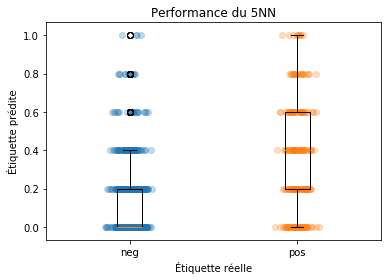

In [28]:
y_test_pos_idx = np.where(y_test==1)[0]
y_test_neg_idx = np.where(y_test==0)[0]

scores_neg = y_pred_5nn_scores[y_test_neg_idx, 1]
scores_pos = y_pred_5nn_scores[y_test_pos_idx, 1]
b = plt.boxplot([scores_neg, scores_pos])

plt.scatter(np.random.normal(1, 0.05, size=len(scores_neg)), scores_neg, alpha=0.25)
plt.scatter(np.random.normal(2, 0.05, size=len(scores_pos)), scores_pos, alpha=0.25)

plt.xticks([1, 2], ['neg', 'pos'])
plt.xlabel('Étiquette réelle')
plt.ylabel('Étiquette prédite')
plt.title("Performance du 5NN")

La différence est que le classificateur prédit bien les valeurs négatives mais mal les valeurs positives. En effet, on observe sur le diagramme de gauche que la plupart des points censés être négatifs, sont très proches de 0 et au moins les 3/4 sont sous 0,5 donc bien classifiés. Mais pour les valeurs positives, ce n'est pas du tout le cas. La majorité des données censées être classifiées positives sont mêmes classifiées négatives.

### 5.5 (Pour aller plus loin) Avec les composantes principales

__Consigne :__ Projetez les données sur le nombre de composantes principales que vous avez choisi dans la section 4, et utilisez ces données-ci pour entrainer un algorithme des 5 plus proches voisins et l'évaluer sur le jeu de test. Comparer ce nouveau modèle à celui obtenu précédemment. Vous pouvez considérer deux variantes : avant et après le prétraitement des données de la section 3.

Attention à bien transformer le jeu de test en le projetant sur les PC calculées sur le jeu d'entraînement.

### 5.6 (Pour aller plus loin) Courbes ROC

Quand la prédiction binaire passe par le seuillage d'une fonction de décision, on peut s'interroger sur la valeur de seuil à utiliser, et chercher à visualiser les performances d'une même fonction de décision selon les différents seuils. 

C'est ce que fait une __courbe ROC__, qui affiche pour chaque seuil possible la sensibilité (aussi appelée rappel ou taux de vrais positifs : il s'agit de (TP/(TP+FN)) vs l'antispécificité (1-spécificité = 1-(TN/(FP+TN)).

Vous pouvez lire [sur OpenClassrooms](https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308261-evaluez-un-algorithme-de-classification-qui-retourne-des-scores#/id/r-4336166) en détail comment elle est construite. 

Voici ci-dessous un exemple de code que vous pouvez utiliser pour tracer la courbe ROC pour vos prédictions `y_pred_5nn_scores`.

## Deuxième partie (après le mercredi 10 juin)
Pour poursuivre le mini-projet, vous allez avoir besoin de compétences et connaissances que vous n'avez pas encore au 20 mai 2020.

## 6. Mise en place d'une validation croisée
La validation croisée vous sera présentée au chapitre 8 et lors de la PC 5 et vous permet de comparer les performances de plusieurs modèles de façon plus satisfaisante qu'une séparation entraînement/test. En particulier, elle permet de « lisser » les particularités qui pourraient être liées à la séparation entraînement/test avec laquelle vous travaillez.

__Consigne :__ sur le même principe que la séparation train/test de la section 1.2, et en vous inspirant de la PC5, mettez en place une validation croisée de `(X_public, y_public)` que vous utiliserez à partir de maintenant.

## 7. Sélection du nombre de plus proches voisins par validation croisée
__Consigne :__ En vous inspirant de la PC5, utilisez maintenant votre validation croisée pour évaluer l'algorithme des 5 plus proches voisins, puis pour sélectionner la valeur optimale du nombre de voisins avec `GridSearchCV`.

Vous pouvez utiliser la grille de valeurs de k suivante, ou la modifier :

In [ ]:
k_values = np.arange(1, 32, step=2)

## 8. Régressions logistiques 
__Consigne :__ En vous inspirant des PC5 et 6, vous pouvez maintenant aussi évaluer et comparer à votre algorithme des plus proches voisins
* une régression logistique 
* une régression logistique régularisée l2
* une régression logistique sparse (i.e. régularisée l1).

Vous trouverez les outils nécessaires dans la classe `LogisticRegression` du module `linear_model` de `scikit-learn` ; il s'agit ainsi d'une variante de la PC5. Comme toujours, référez-vous à la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

## 9. Modèle final

Vous êtes maintenant en mesure de __sélectionner votre modèle favori__. Quel pré-traitement apportez vous aux données ? Quel algorithme utilisez vous, avec quel(s) hyper-paramètre(s) ? 

__Consigne :__
* Chargez les données privées de `../data/credit_private.csv`. Ces données ressemblent à celles de `credit_public.csv` mais sans la colonne des étiquettes.
* Appliquez le pré-traitement que vous avez sélectionné à ces données `X_private` pour obtenir `X_private_processed`.
* Appliquez aussi ce pré-traitement à l'intégralité du jeu de données public `X_public` pour obtenir `X_public_processed`.
* Ré-entraînez votre algorithme favori (avec son/ses hyper-paramètre(s)) sur l'intégralité des données publiques (`X_public_processed, y_public`). 
* Enfin, prédisez les étiquettes de `X_private_processed`. Vous pouvez soumettre deux prédictions :
    * `y_private_binary` : vos prédictions binaires 0/1
    * `y_private_scores` : les valeurs de votre fonction de décision, non seuillée.
    
   
La façon de soumettre vos prédictions pour une évaluation « grandeur réelle » de la qualité de votre modèle vous sera précisée ultérieurement.

## 10. Pour aller plus loin

1) Vous pouvez aussi essayer d'entraîner des forêts aléatoires ou des machines à vecteurs de support sur vos données. Ces méthodes vous seront présentées brièvement au chapitre 9. 
En plus de la documentation de `scikit-learn`, vous pouvez vous référer à OpenClassrooms :
* [Pour les forêts aléatoires](https://openclassrooms.com/fr/courses/4470521-modelisez-vos-donnees-avec-les-methodes-ensemblistes/4664690-tp-mesurez-la-puissance-des-forets-aleatoires).
* [Pour les machines à vecteur de support](https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4722466-classifiez-vos-donnees-avec-une-svm-a-noyau#/id/r-4880828).
    
2) Vous pouvez appliquer des méthodes de __sélection de variables__ à vos données avant l'apprentissage. Par exemple :
* Conserver uniquement les variables apparaissant dans une régression logistique sparse
* Conserver uniquement les variables qui sont liées à l'étiquette : vous pouvez effectuer un test du chi2 (voir PC1) pour les variables catégoriques ou un test t de Student pour comparer, entre deux groupes définis par la valeurs de l'étiquette, les moyennes d'une variable quantitative (attention, ce test suppose que la variable quantitative suit une distribution normale dans les deux groupes).

3) Vous pouvez passer beaucoup plus de temps à __pré-traiter__ vos données. Par exemple, voulez-vous utiliser les 6 valeurs des 6 derniers mois, ou leur minimum, ou leur moyenne ? Peut-être croiser les variables `Sexe` et `Statut_marital` pour obtenir une variable qualitative avec les catégories "femme mariée", "homme célibataire", etc. 